PLA6619 Introduction to Urban Data and Informatics I \
Tuesday, November 24, 2020 \
Week12

# Lab 07: NetworkX and OD Analysis

Please submit __Lab07.ipynb with outputs__ on Canvas by 11:59pm (EST). 

# Load required packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape
from shapely.geometry import Point 

from urllib.parse import urlencode
import urllib.request, json 

import networkx as nx #library supporting networks

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
%matplotlib inline 

# PART 1. Intro to NetworkX - Undirected network
First, let's explore the data structure for the network and/on OD anaylsis.
## 1. Create a undirected network

In [2]:
# Creae an empty undirected network
G = nx.Graph()

## 2. Add nodes and edges

    Syntax:
    YOUR_NETWORK_NAME.add_node() # add a single node
    YOUR_NETWORK_NAME.add_nodes_from(LIST_OF_NODES) # add multiple nodes
    YOUR_NETWORK_NAME.add_edge() # add a single edge
    YOUR_NETWORK_NAME.add_edges_from(LIST_OF_CONNECTIONS) # add multiple edges

In [3]:
#add a node
G.add_node(1)

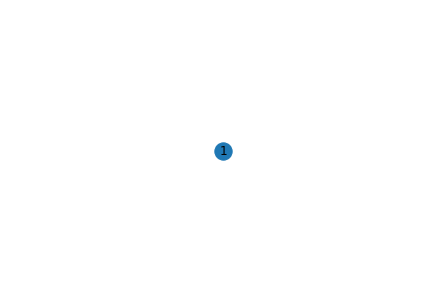

In [4]:
# Visualize 
nx.draw(G, with_labels=True)

In [5]:
#add several nodes
G.add_nodes_from([2,3,4])
#we can add not only numbers but also text (or any other python object) as a node 
G.add_node('A')

#now add an edge
G.add_edge(1,2)
#and a set of edges
G.add_edges_from([(1,3),(1,4),(3,4),('A',3),('A',4)])

## 3. Visualize the network

    Syntax:
    nx.draw(YOUR_NETWORK_NAME)
    
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw.html

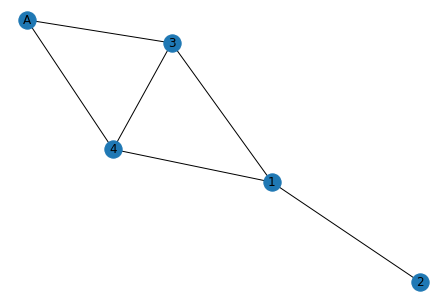

In [6]:
#Visualize
np.random.seed(2015) #fix the origin of random generator - see below why
nx.draw(G, with_labels=True)

__Note__: note that the locations are selected by random - this is why we fixed random generator to make sure appearance is always the same. But what if we have the locations of the nodes we want the python to stick to?

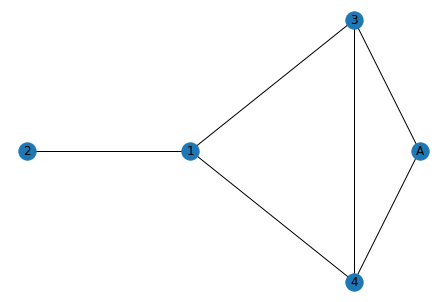

In [7]:
#set up the location for our nodes
pos={1:(50,50),2:(25,50),3:(75,75),4:(75,25),'A':(85,50)}
#visualize for fixed node locations
nx.draw(G,pos=pos,with_labels=True)

## 4. Calculate degree of nodes

    Syntax:
    YOUR_NETWORK_NAME.degree()

In [8]:
G.degree()

DegreeView({1: 3, 2: 1, 3: 3, 4: 3, 'A': 2})

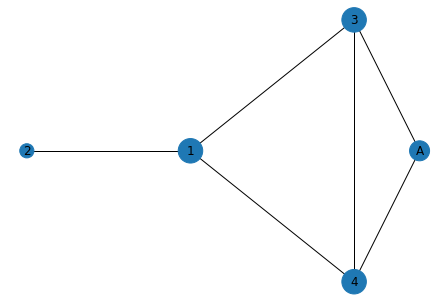

In [9]:
#let's now use node degrees as sizes of the nodes visualized
#bigger-->looks hub
degree_list = [val for (node, val) in G.degree()]
nx.draw(G,pos=pos,node_size=200*np.array(degree_list),with_labels=True)

# PART 2. Intro to NetworkX - Directed network
## 1. Create a directed network

    Syntax:
    YOUR_NETWORK_NAME = nx.DiGraph()

In [10]:
G2=nx.DiGraph() #create a directed graph
#add same edges as before; notice that when we add edges nodes are added automatically
G2.add_edges_from([(1,2),(1,3),(1,4),(3,4),('A',3),('A',4)]) 

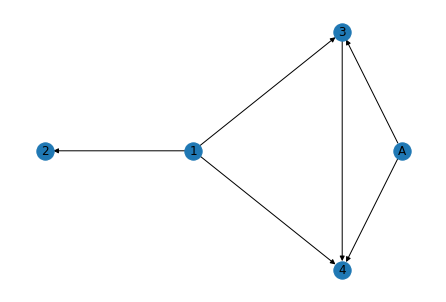

In [11]:
#visualize the network showing directions
nx.draw(G2,pos=pos,with_labels=True,arrows=True)

## 2. Change colors

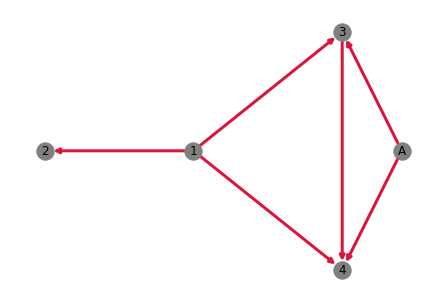

In [12]:
nx.draw(G2,pos=pos,with_labels=True,arrows=True,
       node_color='grey', edge_color='crimson', width=3)

## 3. Incoming and outgoing degrees

In [13]:
#calculate incoming and outgoing degrees
print(G2.in_degree())
print(G2.out_degree())

[(1, 0), (2, 1), (3, 2), (4, 3), ('A', 0)]
[(1, 3), (2, 0), (3, 1), (4, 0), ('A', 2)]


# PART 3. Intro to NetworkX - Weighted network
## 1. Create a directed weighted network

    Syntax:
    YOUR_NETWORK_NAME = nx.DiGraph()
    YOUR_NETWORK_NAME.add_weighted_edges_from()

In [14]:
G3=nx.DiGraph() #create a directed graph

#add same edges as before but with weights
G3.add_weighted_edges_from([(1,2,2),(1,3,2),(1,4,2),(3,4,1),('A',3,3),('A',4,3)])

#we can also add separate edges in the following way
G3.add_edge('A',1,weight=5)

## 2. Check edge information

In [15]:
#we can access all the edges outgoing from a node 'A' like
print(G3['A'])

#a specific edge like
print(G3['A'][1])

{3: {'weight': 3}, 4: {'weight': 3}, 1: {'weight': 5}}
{'weight': 5}


## 3. Modify a weight value

In [16]:
#and modify its properties like
G3['A'][1]['weight']=3

print(G3['A'][1])

{'weight': 3}


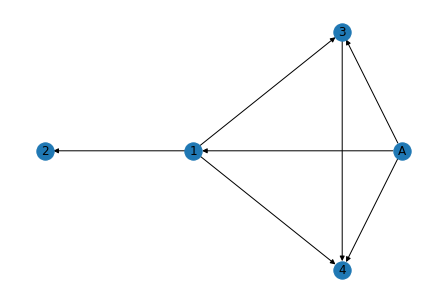

In [17]:
nx.draw(G3,pos=pos,with_labels=True,arrows=True)

## 4. Extract all the edge weights and visualize

In [18]:
print (G3.edges(data=True))

[(1, 2, {'weight': 2}), (1, 3, {'weight': 2}), (1, 4, {'weight': 2}), (3, 4, {'weight': 1}), ('A', 3, {'weight': 3}), ('A', 4, {'weight': 3}), ('A', 1, {'weight': 3})]


In [19]:
#now let's extract all the edge weights into a list (in the same order as edges go)
w=[d['weight'] for (u,v,d) in G3.edges(data=True)]
print(w)

[2, 2, 2, 1, 3, 3, 3]


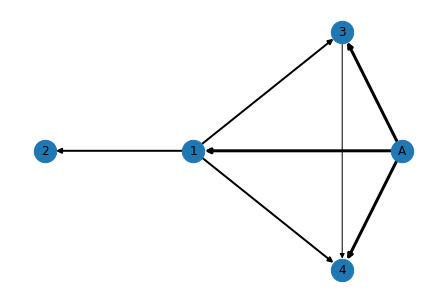

In [20]:
#and visualize the network using edge weights for the edge thikness
nx.draw(G3,pos=pos,with_labels=True,arrows=True,
        width=w,
        node_size=500)

In [23]:
# If you want to add edge labels (weigthed values)
nx.get_edge_attributes(G3, 'weight')

{(1, 2): 2,
 (1, 3): 2,
 (1, 4): 2,
 (3, 4): 1,
 ('A', 3): 3,
 ('A', 4): 3,
 ('A', 1): 3}

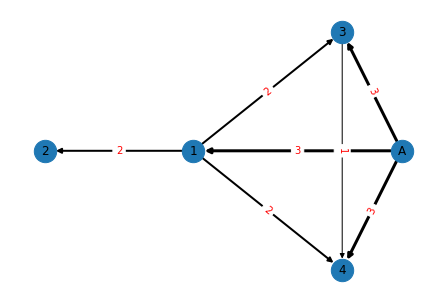

In [24]:
#and visualize the network using edge weights for the edge thikness
nx.draw(G3,pos=pos,with_labels=True,arrows=True,
        width=w,
        node_size=500)

edge_labels = nx.get_edge_attributes(G3,'weight') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()

# PART 4. Airline network
## 1. Load airports and flights (cities to cities) data
Data source: https://openflights.org/data.html

In [21]:
cities = pd.read_csv('../data/airports.csv')
cities.head()

,airport_id,full_name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,Tz_database,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [22]:
cities[cities['IATA']=='JFK']

,airport_id,full_name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,Tz_database,type,source
3597,3797,John F Kennedy International Airport,New York,United States,JFK,KJFK,40.639801,-73.7789,13,-5,A,America/New_York,airport,OurAirports


In [23]:
links = pd.read_csv('../data/cities_to_cities.csv')
links.head()

,origin,departure city,departure lat,departure lon,destination,arrival city,arrival lat,arrival lon,number of routes
0,AAE,Annaba,36.822201,7.809174,ALG,Algier,36.691002,3.215410,1
1,AAE,Annaba,36.822201,7.809174,CDG,Paris,49.012798,2.550000,1
2,AAE,Annaba,36.822201,7.809174,IST,Istanbul,41.275278,28.751944,1
3,AAE,Annaba,36.822201,7.809174,LYS,Lyon,45.725556,5.081111,1
4,AAE,Annaba,36.822201,7.809174,MRS,Marseille,43.439272,5.221424,2


## 2. Create a network with city names as nodes

In [24]:
#create a network with city names as nodes
Flights=nx.DiGraph()
Flights.add_nodes_from(cities['city'])

In [25]:
cities['city'][1]

'Madang'

In [26]:
#create a dictionary of city locations
CityPos={}
for c in range(len(cities)):
    CityPos[cities['city'][c]]=(cities['longitude'][c],cities['latitude'][c])

In [27]:
CityPos

{'Goroka': (145.391998291, -6.0816898345900015),
 'Madang': (145.789001465, -5.20707988739),
 'Mount Hagen': (144.29600524902344, -5.826789855957031),
 'Nadzab': (146.725977, -6.569803),
 'Port Moresby': (147.22000122070312, -9.443380355834961),
 'Wewak': (143.66900634799998, -3.5838301181800003),
 'Narssarssuaq': (-45.4259986877, 61.1604995728),
 'Godthaab': (-51.67810058590001, 64.19090271),
 'Sondrestrom': (-50.7116031647, 67.0122218992),
 'Thule': (-68.70320129390001, 76.5311965942),
 'Akureyri': (-18.07270050048828, 65.66000366210939),
 'Egilsstadir': (-14.401399612426758, 65.28330230712889),
 'Hofn': (-15.2272, 64.295601),
 'Husavik': (-17.426001, 65.952301),
 'Isafjordur': (-23.13529968261719, 66.05809783935547),
 'Keflavik': (-22.605600357055998, 63.985000610352),
 'Patreksfjordur': (-23.965, 65.555801),
 'Reykjavik': (-21.9405994415, 64.1299972534),
 'Siglufjordur': (-18.9167, 66.133301),
 'Vestmannaeyjar': (-20.27890014648437, 63.42430114746094),
 'Sault Sainte Marie': (-84.5

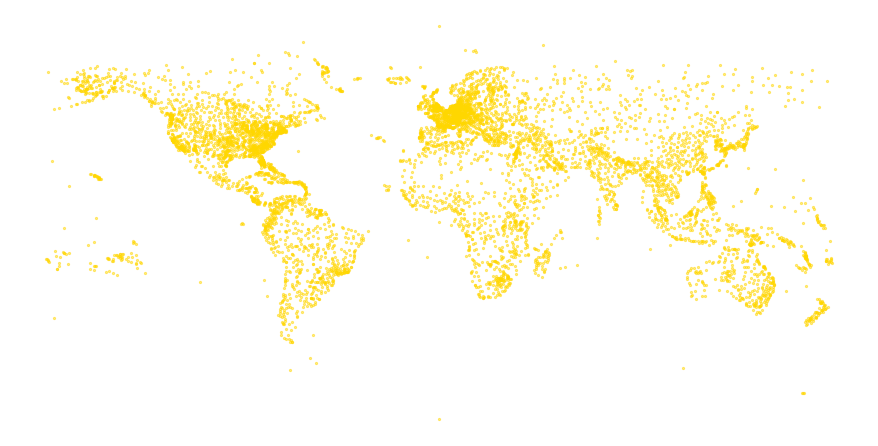

In [28]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(Flights, pos=CityPos, with_labels=False, arrows=False, node_size=5,
       node_color='gold', alpha=0.5)

## 3. Add edges

In [29]:
links.head(2)

,origin,departure city,departure lat,departure lon,destination,arrival city,arrival lat,arrival lon,number of routes
0,AAE,Annaba,36.822201,7.809174,ALG,Algier,36.691002,3.21541,1
1,AAE,Annaba,36.822201,7.809174,CDG,Paris,49.012798,2.55000,1


In [30]:
# create list of edges as tuples
# create list of 0 first
EN=len(links.index)
edgelist=[0]*EN
print (edgelist[:5])

[0, 0, 0, 0, 0]


In [31]:
# create list of edges as tuples
for j in range(0,EN):
    edgelist[j]=(links['departure city'][j],links['arrival city'][j], links['number of routes'][j])
edgelist

[('Annaba', 'Algier', 1),
 ('Annaba', 'Paris', 1),
 ('Annaba', 'Istanbul', 1),
 ('Annaba', 'Lyon', 1),
 ('Annaba', 'Marseille', 2),
 ('Annaba', 'Oran', 1),
 ('Annaba', 'Paris', 2),
 ('Aalborg', 'Aarhus', 1),
 ('Aalborg', 'Malaga', 1),
 ('Aalborg', 'Alicante', 1),
 ('Aalborg', 'Amsterdam', 2),
 ('Aalborg', 'Stockholm', 1),
 ('Aalborg', 'Barcelona', 2),
 ('Aalborg', 'Billund', 3),
 ('Aalborg', 'Copenhagen', 2),
 ('Aalborg', 'Istanbul', 1),
 ('Aalborg', 'London', 1),
 ('Aalborg', 'Oslo', 3),
 ('Aalborg', 'Palma de Mallorca', 1),
 ('Aalborg', 'Stavanger', 1),
 ('Al Ain', 'Calicut', 1),
 ('Al Ain', 'Peshawar', 1),
 ('Anapa', 'Moscow', 1),
 ('Anapa', 'St. Petersburg', 1),
 ('Anapa', 'Moscow', 1),
 ('Aarhus', 'Aalborg', 1),
 ('Aarhus', 'Malaga', 1),
 ('Aarhus', 'Stockholm', 1),
 ('Aarhus', 'Copenhagen', 1),
 ('Aarhus', 'Gothenborg', 1),
 ('Aarhus', 'Oslo', 1),
 ('Aarhus', 'Palma de Mallorca', 1),
 ('Aarhus', 'London', 1),
 ('Altay', 'Urumqi', 2),
 ('Araxa', 'Patos de Minas', 1),
 ('Al Ghaidah

In [32]:
# add edges to the network
# Flights.add_edges_from(edgelist) # If you run this code, then there will be no weighted value for edges
Flights.add_weighted_edges_from(edgelist)

## 4. Incoming and outgoing degree

In [33]:
#calculate incoming and outgoing degrees
print(Flights.in_degree())
print(Flights.out_degree())

[('Goroka', 4), ('Madang', 7), ('Mount Hagen', 9), ('Nadzab', 9), ('Port Moresby', 34), ('Wewak', 4), ('Narssarssuaq', 5), ('Godthaab', 9), ('Sondrestrom', 8), ('Thule', 2), ('Akureyri', 1), ('Egilsstadir', 1), ('Hofn', 0), ('Husavik', 0), ('Isafjordur', 1), ('Keflavik', 32), ('Patreksfjordur', 0), ('Reykjavik', 5), ('Siglufjordur', 0), ('Vestmannaeyjar', 0), ('Sault Sainte Marie', 3), ('Winnipeg', 23), ('Halifax', 33), ('St. Anthony', 3), ('Tofino', 0), ('Pelly Bay', 0), ('Baie Comeau', 4), ('Bagotville', 3), ('Baker Lake', 3), ('Campbell River', 3), ('Brandon', 1), ('Cambridge Bay', 4), ('Nanaimo', 2), ('Castlegar', 2), ('Chatham', 0), ('Charlo', 2), ('Coppermine', 3), ('Coronation', 0), ('Chilliwack', 0), ('Clyde River', 2), ('Coral Harbour', 4), ('Dawson', 0), ('Burwash', 0), ('Princeton', 0), ('Deer Lake', 7), ('Dease Lake', 0), ('Dauphin', 0), ('Dawson Creek', 2), ('Edmonton', 37), ('Eskimo Point', 3), ('Estevan', 0), ('Edson', 0), ('Eureka', 0), ('Inuvik', 7), ('Iqaluit', 10), (

In [34]:
print (Flights.in_degree(weight='weight')['London'])
print (Flights.out_degree(weight='weight')['London'])

656
652


In [35]:
# Convert pandas dataframe and join two information (incoming and outgoing degrees for each city)
in_degree = pd.DataFrame.from_dict(dict(Flights.in_degree()), orient='index').reset_index()
in_degree.columns = ['city', 'in_degree']
out_degree = pd.DataFrame.from_dict(dict(Flights.out_degree()), orient='index').reset_index()
out_degree.columns = ['city', 'out_degree']

in_degree.head()

,city,in_degree
0,Goroka,4
1,Madang,7
2,Mount Hagen,9
3,Nadzab,9
4,Port Moresby,34


In [36]:
in_out_degree = pd.merge(in_degree, out_degree, how='outer', on='city')

In [37]:
in_out_degree.sort_values(by='in_degree', ascending=False).head(30)

,city,in_degree,out_degree
166,London,345,346
1290,Paris,273,279
2672,Moscow,253,254
1578,Istanbul,239,237
327,Frankfurt,233,234
553,Amsterdam,225,226
2998,Beijing,209,209
3277,Atlanta,207,207
3323,Chicago,204,203
1995,Dubai,190,196


## 4. Visualize the airline routes network

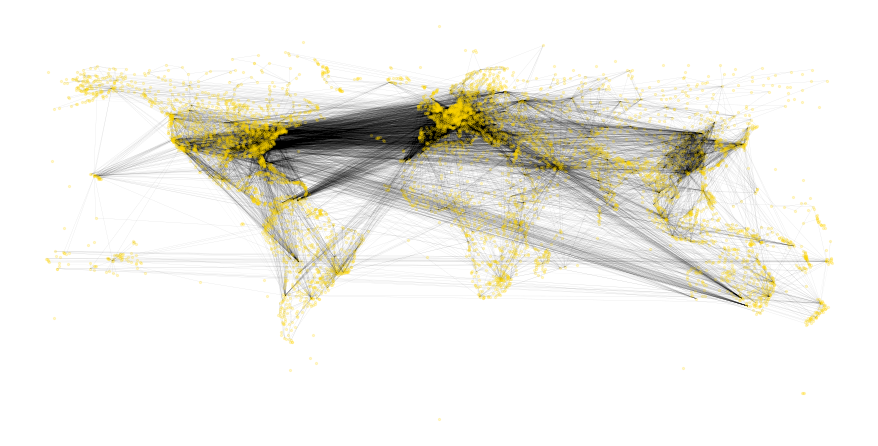

In [38]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights, pos=CityPos, with_labels=False, arrows=False, node_size=5,
       node_color='gold', alpha=0.2, style='dotted', edge_color='k', width=0.2)

## 5. The most connected airport based on degree
* This is the same as "degree centrality"

In [39]:
#most connected airport
d=[val for (node, val) in Flights.degree()]
node = [node for (node, val) in Flights.degree()]
# print (d)

j=np.argmax(d) # get index value where degree is the highest
print (j)
print (node[j])

166
London


In [40]:
print('Most connected airport is {0} with {1} connections'.format(node[j],d[j]))

Most connected airport is London with 691 connections


In [41]:
print (np.mean(d))

10.048878665899942


## 6. Check other centrality scores of airports
* Degree centrality
* Eigenvector centrality

In [42]:
#output top ten centrality scores, given the dictionary d
def topdict(d,tn):
#     ind=sorted(d, key=dict(d).get, reverse=True)
    ind = sorted(dict(c1), key=dict(c1).__getitem__, reverse=True)
    for i in range(0,tn):
        print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

Now compute five centrality metrics - degree, eigenvector, betweenness, closeness and pagerank - and output top 10 world cities in terms according to those metrics

### 1) Degree centrality

In [43]:
# Degree centrality
c1= nx.degree(Flights)
topdict(c1,10)

1|London:691
2|Paris:552
3|Moscow:507
4|Istanbul:476
5|Frankfurt:467
6|Amsterdam:451
7|Beijing:418
8|Atlanta:414
9|Chicago:407
10|Dubai:386


### 2) Eigenvector centrality

In [44]:
# Eigenvector centrality
c2= nx.eigenvector_centrality(Flights)
topdict(c2,10)

1|London:0.19344576898301935
2|Paris:0.16900943400050086
3|Moscow:0.11992739935290858
4|Istanbul:0.13203553220570574
5|Frankfurt:0.16529961363242046
6|Amsterdam:0.16254358637205674
7|Beijing:0.08513018282135607
8|Atlanta:0.0849049244342356
9|Chicago:0.09469389856889959
10|Dubai:0.10618585495564663


### 3) Betweenness centrality
* This takes too long due to it check all direct and indirect connection combinations among nodes (~ 3mins)

In [45]:
c3 = nx.betweenness_centrality(Flights)
topdict(c3,10)

1|London:0.01764907051295418
2|Paris:0.015123411604989817
3|Moscow:0.012563736283204813
4|Istanbul:0.009330044024344444
5|Frankfurt:0.008210871378514622
6|Amsterdam:0.00657332072382313
7|Beijing:0.00919757552099804
8|Atlanta:0.005238606841756557
9|Chicago:0.0064377563252955745
10|Dubai:0.009903031731016814


### 4) Closeness centrality
* This takes too long due to it check all direct and indirect connection combinations among nodes (~ 1mins)

In [46]:
c4 = nx.closeness_centrality(Flights)
topdict(c4,10)

1|London:0.19240604055591157
2|Paris:0.19248521999646956
3|Moscow:0.17861726753745713
4|Istanbul:0.18333123252864686
5|Frankfurt:0.18774648832944382
6|Amsterdam:0.1843427816308806
7|Beijing:0.18124738488430162
8|Atlanta:0.17300175733870832
9|Chicago:0.17672761382547394
10|Dubai:0.18729541561322252


## 7. Visualize the network with the node size proportional to the degree centrality (or any other centrality)
* First, visualize just the network topology
* Then visualize network in space with respect to real geographical context


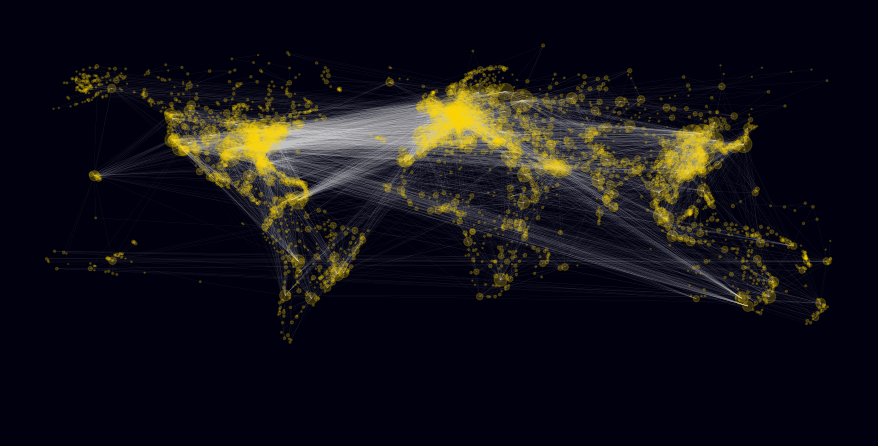

In [47]:
node_size_original = list(dict(c1).values()) # based on degree centrality

#visualize the network
fig = plt.figure(figsize = (12,6))
nx.draw(Flights, pos=CityPos, with_labels=False,arrows=False, 
        node_size=node_size_original, 
       node_color='gold', alpha=0.2, style='dotted', edge_color='white', width=0.2)
fig.set_facecolor("#00000F")